In [37]:
import csv

input_file = "/content/WISDM_ar_v1.1_raw.txt"
output_file = "WISDM_data.csv"
l=[]
with open(input_file, "r") as infile, open(output_file, "w", newline="") as outfile:
    csv_writer = csv.writer(outfile)

    csv_writer.writerow(["user", "activity", "timestamp", "x_accel", "y_accel", "z_accel"])

    for line in infile:
        line = line.strip().rstrip(';')

        parts = line.split(",")

        if len(parts) == 6:
            csv_writer.writerow(parts)
        else:
          l.append(parts)
    print(len(l))

3


In [38]:
import numpy as np
import pandas as pd
data=pd.read_csv("/content/WISDM_data.csv")

In [39]:
data
print(len(data[data['timestamp']!=0]))

208411


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217716 entries, 0 to 217715
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   user       217716 non-null  int64  
 1   activity   217716 non-null  object 
 2   timestamp  217716 non-null  int64  
 3   x_accel    217716 non-null  float64
 4   y_accel    217716 non-null  float64
 5   z_accel    217716 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 10.0+ MB


In [41]:
data=data[data['timestamp']!=0]
data["activity"].loc[data["activity"]=="Walking"]=5
data["activity"].loc[data["activity"]=="Jogging"]=4
data["activity"].loc[data["activity"]=="Upstairs"]=3
data["activity"].loc[data["activity"]=="Downstairs"]=2
data["activity"].loc[data["activity"]=="Sitting"]=1
data["activity"].loc[data["activity"]=="Standing"]=0

<ipython-input-41-8cf3d7bb8eb2>:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data["activity"].loc[data["activity"]=="Walking"]=5
<ipython-input-41-8cf3d7bb8eb2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

In [42]:
data

,user,activity,timestamp,x_accel,y_accel,z_accel
0,33,4,49105962326000,-0.694638,12.680544,0.503953
1,33,4,49106062271000,5.012288,11.264028,0.953424
2,33,4,49106112167000,4.903325,10.882658,-0.081722
3,33,4,49106222305000,-0.612916,18.496431,3.023717
4,33,4,49106332290000,-1.184970,12.108489,7.205164
...,...,...,...,...,...,...
217711,27,2,12053252301000,-1.730000,5.940000,0.422231
217712,27,2,12053302259000,-0.990000,9.700000,6.782933
217713,27,2,12053352277000,1.040000,8.080000,0.149824
217714,27,2,12053452283000,-3.950000,18.730000,6.170018


In [43]:
data['time'] = pd.to_timedelta(data['timestamp'], unit='ns')
data['hours'] = data['time'].dt.components['hours']
data['minutes'] = data['time'].dt.components['minutes']
data['seconds'] = data['time'].dt.components['seconds']
micro = (data['time'].dt.components['microseconds'] +
         data['time'].dt.components['milliseconds'] * 1000)
data['milliseconds'] = micro / 1000.0
data.drop(columns=['timestamp','time'], inplace=True)

In [44]:
data

,user,activity,x_accel,y_accel,z_accel,hours,minutes,seconds,milliseconds
0,33,4,-0.694638,12.680544,0.503953,13,38,25,962.326
1,33,4,5.012288,11.264028,0.953424,13,38,26,62.271
2,33,4,4.903325,10.882658,-0.081722,13,38,26,112.167
3,33,4,-0.612916,18.496431,3.023717,13,38,26,222.305
4,33,4,-1.184970,12.108489,7.205164,13,38,26,332.290
...,...,...,...,...,...,...,...,...,...
217711,27,2,-1.730000,5.940000,0.422231,3,20,53,252.301
217712,27,2,-0.990000,9.700000,6.782933,3,20,53,302.259
217713,27,2,1.040000,8.080000,0.149824,3,20,53,352.277
217714,27,2,-3.950000,18.730000,6.170018,3,20,53,452.283


In [45]:
object_data=data.select_dtypes(include=['number'])
for j in object_data.columns:
  print(j)
  print(data[j].nunique())
  print(data[j].unique())
print(data.info())

user
8
[33 17 20 29 13 15  6 27]
x_accel
1753
[ -0.6946377   5.012288    4.903325  ... -18.39      -17.31
 -16.02     ]
y_accel
1798
[ 12.680544  11.264028  10.882658 ... -14.79     -18.85     -17.16    ]
z_accel
993
[  0.50395286   0.95342433  -0.08172209   3.0237172    7.205164
  -6.510526     5.706926     7.0553403    5.134871     1.6480621
   2.7240696    2.982856    -0.29964766  -8.158588     8.539958
   2.9147544   -1.4573772    9.425281   -10.18802     -9.724928
   1.5390993    3.718355     0.08172209   6.510526    -4.630918
  13.525005     6.1700177    4.0180025    2.3699405    4.7126403
   0.84446156   8.730643    -1.3075534    8.281172     0.88532263
  -0.6537767    3.990762     2.4108016   -3.1463003    6.5513873
   0.53119355   0.7627395    8.158588    -2.7921712   13.824653
   1.334794     2.5606253    1.9885708    4.671779    -3.336985
  -7.8861814    4.6036777    3.486809    -0.19068487   6.469665
  -4.372132     5.7477865    6.2108784    3.7864566   -1.7570249
   6.3198

user


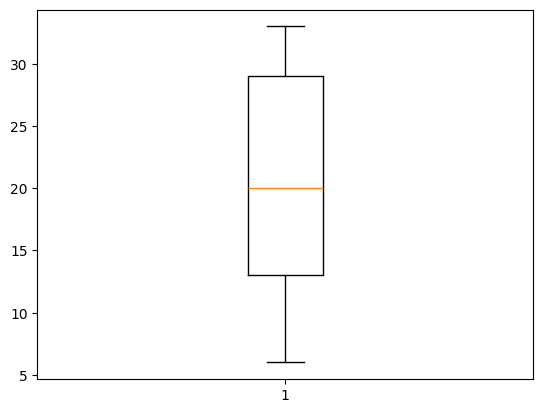

x_accel


<ipython-input-46-64b81d8588c1>:11: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data[i].loc[data[i]<lower_bound]=lower_bound
<ipython-input-46-64b81d8588c1>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

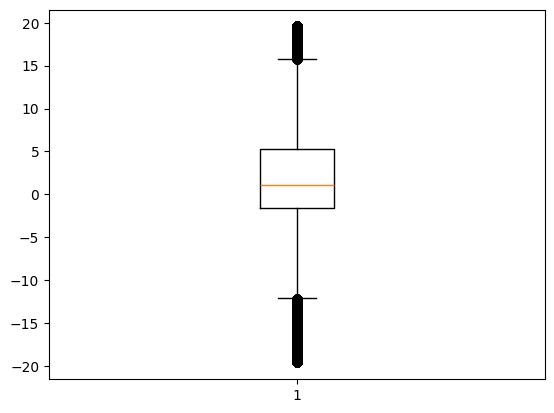

<ipython-input-46-64b81d8588c1>:11: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data[i].loc[data[i]<lower_bound]=lower_bound
<ipython-input-46-64b81d8588c1>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

y_accel


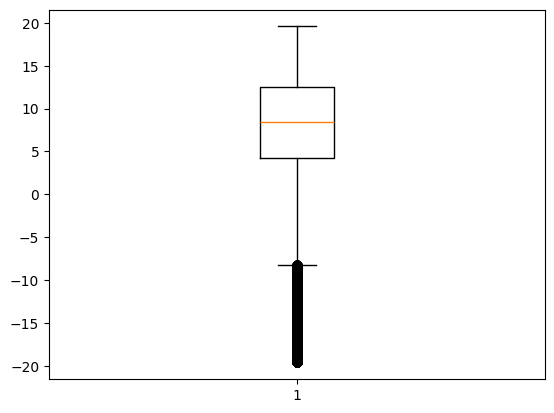

<ipython-input-46-64b81d8588c1>:11: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data[i].loc[data[i]<lower_bound]=lower_bound
<ipython-input-46-64b81d8588c1>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

z_accel


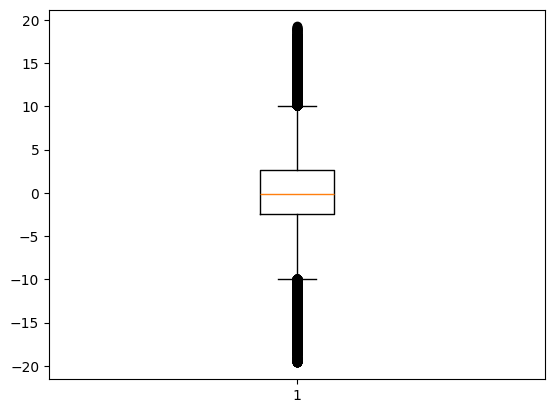

<ipython-input-46-64b81d8588c1>:11: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data[i].loc[data[i]<lower_bound]=lower_bound
<ipython-input-46-64b81d8588c1>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

hours


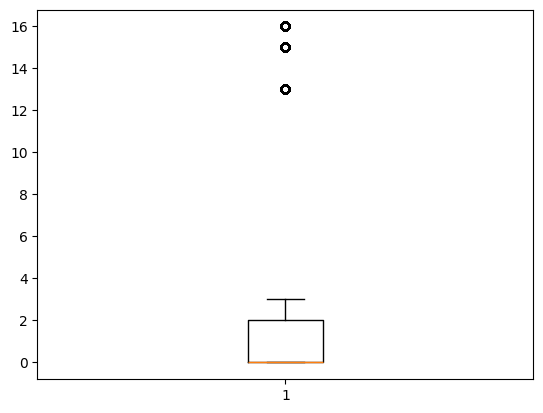

<ipython-input-46-64b81d8588c1>:11: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data[i].loc[data[i]<lower_bound]=lower_bound
<ipython-input-46-64b81d8588c1>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

minutes


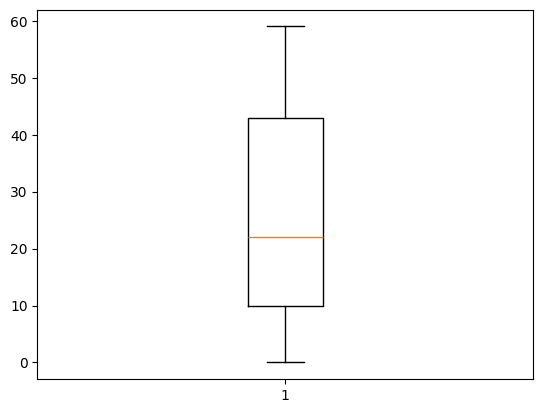

<ipython-input-46-64b81d8588c1>:11: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data[i].loc[data[i]<lower_bound]=lower_bound
<ipython-input-46-64b81d8588c1>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

seconds


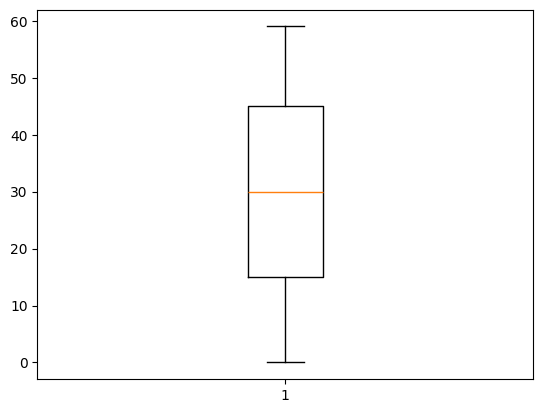

<ipython-input-46-64b81d8588c1>:11: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data[i].loc[data[i]<lower_bound]=lower_bound
<ipython-input-46-64b81d8588c1>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

milliseconds


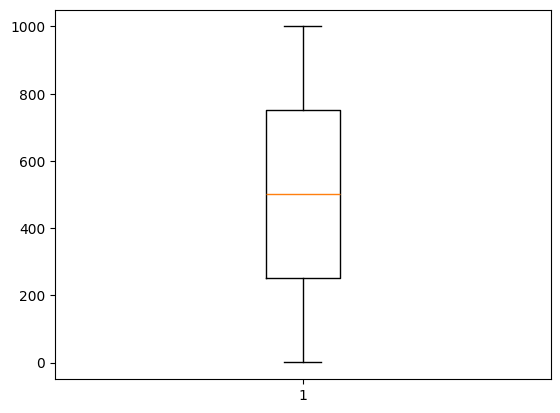

<ipython-input-46-64b81d8588c1>:11: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data[i].loc[data[i]<lower_bound]=lower_bound
<ipython-input-46-64b81d8588c1>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

In [46]:
import matplotlib.pyplot as plt
for i in object_data.columns:
  print(i)
  plt.boxplot(data[i])
  plt.show()
  Q1=data[i].quantile(0.25)
  Q3=data[i].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  data[i].loc[data[i]<lower_bound]=lower_bound
  data[i].loc[data[i]>upper_bound]=upper_bound
#Outliers are handled

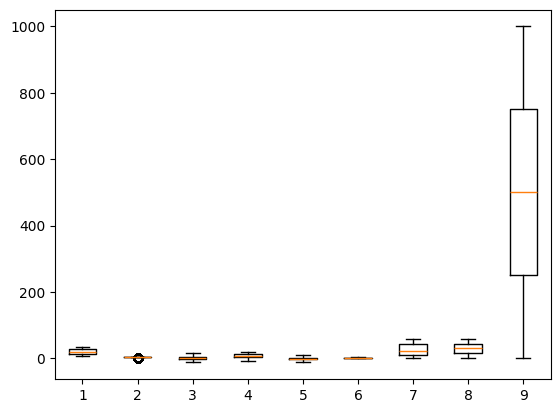

In [47]:
plt.boxplot(data)
plt.show()

In [48]:
data

,user,activity,x_accel,y_accel,z_accel,hours,minutes,seconds,milliseconds
0,33,4,-0.694638,12.680544,0.503953,5,38.0,25,962.326
1,33,4,5.012288,11.264028,0.953424,5,38.0,26,62.271
2,33,4,4.903325,10.882658,-0.081722,5,38.0,26,112.167
3,33,4,-0.612916,18.496431,3.023717,5,38.0,26,222.305
4,33,4,-1.184970,12.108489,7.205164,5,38.0,26,332.290
...,...,...,...,...,...,...,...,...,...
217711,27,2,-1.730000,5.940000,0.422231,3,20.0,53,252.301
217712,27,2,-0.990000,9.700000,6.782933,3,20.0,53,302.259
217713,27,2,1.040000,8.080000,0.149824,3,20.0,53,352.277
217714,27,2,-3.950000,18.730000,6.170018,3,20.0,53,452.283


In [ ]:
#Drop identiefer column
data.drop(columns=['user'], inplace=True)